### Grouping based on best hit method

Goal: finding best annotated hits from AF, pdb and phold foldseek hit results

In [2]:
!conda list --explicit

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: linux-64
# created-by: conda 24.11.0
@EXPLICIT
https://repo.anaconda.com/pkgs/main/linux-64/_libgcc_mutex-0.1-main.conda
https://repo.anaconda.com/pkgs/main/linux-64/ca-certificates-2024.11.26-h06a4308_0.conda
https://repo.anaconda.com/pkgs/main/linux-64/ld_impl_linux-64-2.38-h1181459_1.conda
https://repo.anaconda.com/pkgs/main/linux-64/libstdcxx-ng-11.2.0-h1234567_1.conda
https://repo.anaconda.com/pkgs/main/noarch/pybind11-abi-5-hd3eb1b0_0.conda
https://repo.anaconda.com/pkgs/main/noarch/tzdata-2024a-h04d1e81_0.conda
https://repo.anaconda.com/pkgs/main/linux-64/libgomp-11.2.0-h1234567_1.conda
https://repo.anaconda.com/pkgs/main/linux-64/_openmp_mutex-5.1-1_gnu.conda
https://repo.anaconda.com/pkgs/main/linux-64/libgcc-ng-11.2.0-h1234567_1.conda
https://repo.anaconda.com/pkgs/main/linux-64/bzip2-1.0.8-h5eee18b_6.conda
https://repo.anaconda.com/pkgs/main/linux-64/c-ares-1.

In [2]:
# imports
import os
import random
import re
import pandas as pd
from collections import Counter

### Goal 1: break down best hit function into different functions

In [5]:
base_path = "c_structure_annotation/structure_comp"
batch_prot = {}

for i in range(1,6):  
    batch = f"batch_{i}"
    path_batch = os.path.join(base_path, batch)
    ncbi_proteins = set()
    
    # go over results
    for file in os.listdir(path_batch):
        if "relaxed.pdb" in file:
            ncbi_protein = file.split("_relaxed")[0]
            ncbi_proteins.add(ncbi_protein)
    batch_prot[batch] = ncbi_proteins
    

In [10]:
# function returning the FoldSeek files for a protein in a batch
# reading in the FoldSeek output files for a specific protein in a batch
def read_foldseek_protein(batch, protein):
    batch_dir = os.path.join(base_path, batch)
    pdb_fil = os.path.join(batch_dir, f"{protein}_foldseek_pdb_processed.csv")
    af50m_fil = os.path.join(batch_dir, f"{protein}_foldseek_af50m_processed.csv")
    phold_fil = os.path.join(batch_dir, f"{protein}_foldseek_phold_processed.csv")
    
    try: 
        df_pdb_fil = pd.read_csv(pdb_fil)
        df_af50m_fil = pd.read_csv(af50m_fil)
        df_phold_fil = pd.read_csv(phold_fil)
        return  df_pdb_fil, df_af50m_fil,df_phold_fil
    except FileNotFoundError:
        print(f"issue for {batch} protein {protein}.")
        return None, None, None

In [ ]:
# reading in the FoldSeek output files for a specific protein in a batch
     # use previously created function read_foldseek_protein(batch, protein)
# checking whether this returns any errors - it does not, so all files can be read
for batch, protein_set in batch_prot.items():
    for protein in protein_set:
        pdb_fil, af50m_fil, phold_fil = read_foldseek_protein(batch, protein)

In [15]:
#af
for index_batch in range(1, 6): 
    batch_dir = os.path.join(base_path, f"batch_{index_batch}")
    af50m_files = [f for f in os.listdir(batch_dir) if f.endswith('_foldseek_af50m_processed.csv')]

    for file_name in af50m_files:
        protein = file_name.replace('_foldseek_af50m_processed.csv', '')
        file_path = os.path.join(batch_dir, file_name)

        try:
            af50m_df = pd.read_csv(file_path)
            is_empty = af50m_df.empty
            print(f"[AF50M] Batch: batch_{index_batch}, Protein: {protein}, Empty: {is_empty}")

        except Exception as e:
            print(f"Error loading AF50M file {file_path}: {e}")


[AF50M] Batch: batch_1, Protein: AFD106931, Empty: False
[AF50M] Batch: batch_1, Protein: AFD107021, Empty: False
[AF50M] Batch: batch_1, Protein: AFQ220321, Empty: False
[AF50M] Batch: batch_1, Protein: AFQ220701, Empty: False
[AF50M] Batch: batch_1, Protein: Station189_MES_ALL_assembly_NODE_4836_length_17546_cov_50620205_3, Empty: False
[AF50M] Batch: batch_1, Protein: Station168_IZZ_ALL_assembly_NODE_8815_length_13488_cov_12458870_3, Empty: False
[AF50M] Batch: batch_1, Protein: Station56_SUR_ALL_assembly_NODE_2123_length_11757_cov_11895402_7, Empty: False
[AF50M] Batch: batch_1, Protein: Station201_SUR_ALL_assembly_NODE_6754_length_10937_cov_49332476_10, Empty: False
[AF50M] Batch: batch_1, Protein: AFQ220821, Empty: False
[AF50M] Batch: batch_1, Protein: AFQ220831, Empty: False
[AF50M] Batch: batch_1, Protein: AFQ220871, Empty: False
[AF50M] Batch: batch_1, Protein: ADX320601, Empty: False
[AF50M] Batch: batch_1, Protein: AGS816971, Empty: False
[AF50M] Batch: batch_1, Protein: AD

In [ ]:
#pdb
for index_batch in range(1, 6): 
    batch_dir = os.path.join(base_path, f"batch_{index_batch}")
    pdb_files = [f for f in os.listdir(batch_dir) if f.endswith('_foldseek_pdb_processed.csv')]

    for file_name in pdb_files:
        protein = file_name.replace('_foldseek_pdb_processed.csv', '')
        file_path = os.path.join(batch_dir, file_name)

        try:
            pdb_df = pd.read_csv(file_path)
            is_empty = pdb_df.empty
            print(f"[PDB] Batch: batch_{index_batch}, Protein: {protein}, Empty: {is_empty}")

        except Exception as e:
            print(f"Error loading PDB file {file_path}: {e}")


In [ ]:
# phold
for index_batch in range(1, 6): 
    batch_dir = os.path.join(base_path, f"batch_{index_batch}")
    phold_files = [f for f in os.listdir(batch_dir) if f.endswith('_foldseek_phold_processed.csv')]

    for file_name in phold_files:
        protein = file_name.replace('_foldseek_phold_processed.csv', '')
        file_path = os.path.join(batch_dir, file_name)

        try:
            phold_df = pd.read_csv(file_path)
            is_empty = phold_df.empty
            print(f"[PHOLD] Batch: batch_{index_batch}, Protein: {protein}, Empty: {is_empty}")


        except Exception as e:
            print(f"Error loading PHold file {file_path}: {e}")


All false for PDB and Phold as well

In [3]:
#counting all the hits depending on source
hit_results = []

for index_batch in range(1, 6): 
    batch = f"batch_{index_batch}"
    batch_dir = os.path.join(base_path, batch)

    protein_files = [f for f in os.listdir(batch_dir) if f.endswith('_foldseek_af50m_processed.csv')]
    protein_names = [f.replace('_foldseek_af50m_processed.csv', '') for f in protein_files]

    for protein in protein_names:
        file_info = [
            ("PDB", f"{protein}_foldseek_pdb_processed.csv"),
            ("AF50M", f"{protein}_foldseek_af50m_processed.csv"),
            ("PHOLD", f"{protein}_foldseek_phold_processed.csv"),
        ]

        for label, filename in file_info:
            path = os.path.join(batch_dir, filename)
            try:
                df = pd.read_csv(path)
                hit_count = len(df)
                hit_results.append({
                    "batch": batch,
                    "protein": protein,
                    "source": label,
                    "hit_count": hit_count
                })
            except Exception:
                hit_results.append({
                    "batch": batch,
                    "protein": protein,
                    "source": label,
                    "hit_count": "error"
                })


hits_df = pd.DataFrame(hit_results)
hits_df.to_csv("foldseek_hit_counts.csv", index=False)
print("Saved results to foldseek_hit_counts.csv")


Saved results to foldseek_hit_counts.csv


In [5]:
import pandas as pd

df = pd.read_csv("foldseek_hit_counts.csv")

df = df[df["hit_count"] != "error"]

df["hit_count"] = pd.to_numeric(df["hit_count"])

# Average number of hits per source
average_hits_per_source = df.groupby("source")["hit_count"].mean().reset_index()

# Average number of hits per protein
average_hits_per_protein = df.groupby("protein")["hit_count"].mean().reset_index()
average_hits_per_source.to_csv("average_hits_per_source.csv", index=False)
average_hits_per_protein.to_csv("average_hits_per_protein.csv", index=False)

print("Average hits per source:")
print(average_hits_per_source)

print("\nAverage hits per protein:")
print(average_hits_per_protein)


Average hits per source:
  source   hit_count
0  AF50M  156.687601
1    PDB   22.278912
2  PHOLD  365.493639

Average hits per protein:
            protein  hit_count
0         AAF807661      179.0
1         AAF808321       78.0
2         AAQ139271        9.5
3         AAQ139311      146.5
4         AAQ139341       54.0
..              ...        ...
616  biochar_967_32       38.0
617  biochar_981_36        9.0
618   biochar_994_1       31.0
619  biochar_994_38        3.0
620   biochar_994_5      254.0

[621 rows x 2 columns]


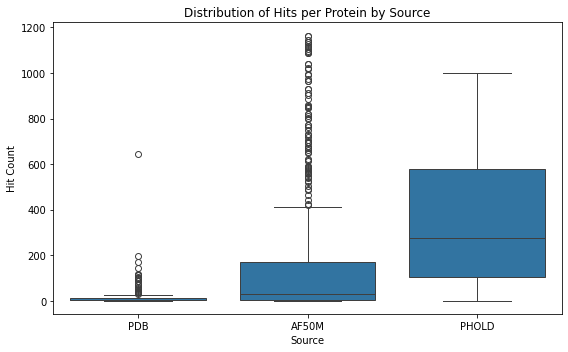

In [6]:
df = pd.read_csv("foldseek_hit_counts.csv")
df = df[df["hit_count"] != "error"]
df["hit_count"] = pd.to_numeric(df["hit_count"])

plt.figure(figsize=(8, 5))
sns.boxplot(x="source", y="hit_count", data=df)
plt.title("Distribution of Hits per Protein by Source")
plt.xlabel("Source")
plt.ylabel("Hit Count")
plt.tight_layout()
plt.show()


/tmp/ipykernel_374808/1276954.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_374808/1276954.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


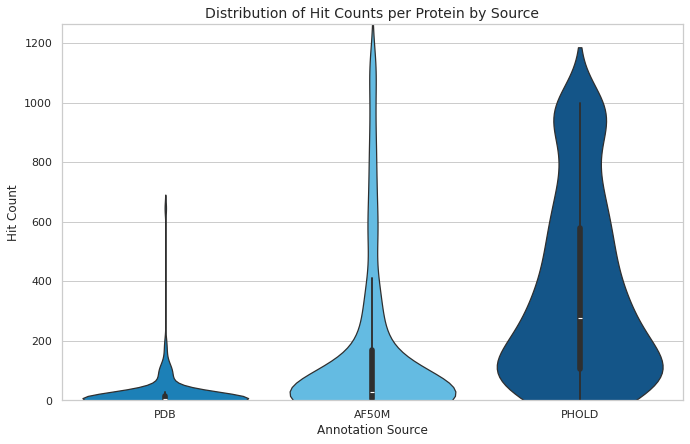

In [16]:
df = df[df["hit_count"] != "error"]
df["hit_count"] = pd.to_numeric(df["hit_count"])
df = df[df["hit_count"] >= 0]  

source_palette = {
    "AF50M": "#4FC3F7",   # bright cyan
    "PDB": "#0288D1",     # strong blue
    "PHOLD": "#01579B"    # deep navy
}

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(
    x="source",
    y="hit_count",
    data=df,
    palette=source_palette,
    inner="box",
    scale="width",
    cut=2,  # Smooth tails
    ax=ax
)

ax.set_ylim(0, df["hit_count"].max() + 100)
ax.set_position([0.1, 0.2, 0.8, 0.7])  

plt.title("Distribution of Hit Counts per Protein by Source", fontsize=14)
plt.xlabel("Annotation Source", fontsize=12)
plt.ylabel("Hit Count", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


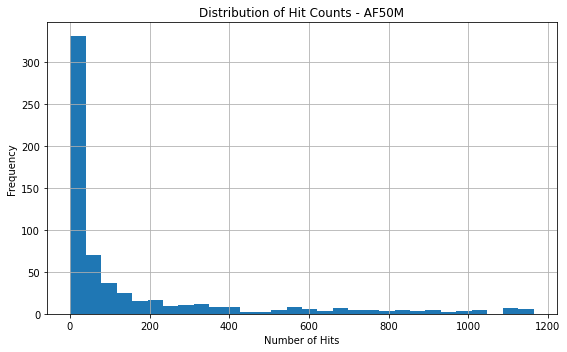

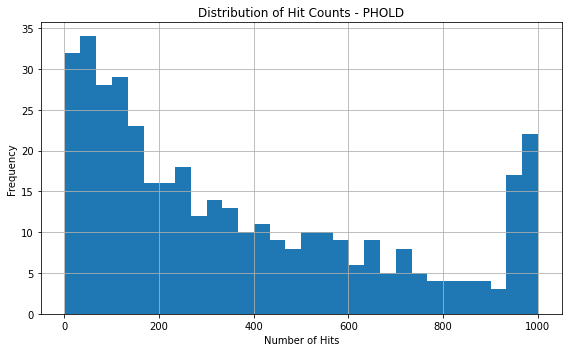

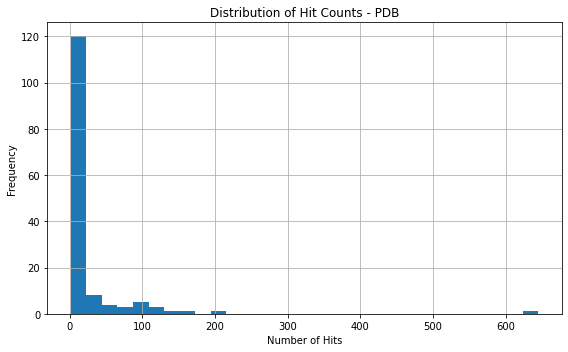

In [4]:
df = df[df["hit_count"] != "error"]
df["hit_count"] = pd.to_numeric(df["hit_count"])

sources = ["AF50M", "PHOLD", "PDB"]
source_dfs = {source: df[df["source"] == source] for source in sources}

for source in sources:
    plt.figure(figsize=(8, 5))
    plt.hist(source_dfs[source]["hit_count"], bins=30)
    plt.title(f"Distribution of Hit Counts - {source}")
    plt.xlabel("Number of Hits")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# sorting the results by bits
batch_dir = os.path.join(base_path, batch)

# Get all processed AF50M files to determine protein names
protein_files = [f for f in os.listdir(batch_dir) if f.endswith('_foldseek_af50m_processed.csv')]
protein_names = [f.replace('_foldseek_af50m_processed.csv', '') for f in protein_files]

# Limit to first 10 proteins
for protein in protein_names[:10]:
    print(f"\nProtein: {protein}")

    # Processed (filtered) file paths
    pdb_fil_path = os.path.join(batch_dir, f"{protein}_foldseek_pdb_processed.csv")
    af50m_fil_path = os.path.join(batch_dir, f"{protein}_foldseek_af50m_processed.csv")
    phold_fil_path = os.path.join(batch_dir, f"{protein}_foldseek_phold_processed.csv")

    for label, path in [
        ("PDB", pdb_fil_path),
        ("AF50M", af50m_fil_path),
        ("PHOLD", phold_fil_path),
    ]:
        try:
            df = pd.read_csv(path)
            if not df.empty:
                df_sorted = df.sort_values("bits", ascending=False)
                print(f"\n{label} (processed) - Top 2 hits:\n", df_sorted.head(2))
            else:
                print(f"\n{label} (processed) is empty.")
        except FileNotFoundError:
            print(f"\n{label} (processed) file not found for {protein}.")
        except Exception as e:
            print(f"\nError reading {label} (processed) for {protein}: {e}")


In [1]:
total_unknown = {
    "PDB": 0,
    "AF50M": 0,
    "PHOLD": 0
}

for index_batch in range(1, 6): 
    batch = f"batch_{index_batch}"
    batch_dir = os.path.join(base_path, batch)

    protein_files = [f for f in os.listdir(batch_dir) if f.endswith('_foldseek_af50m_processed.csv')]
    protein_names = [f.replace('_foldseek_af50m_processed.csv', '') for f in protein_files]

    for protein in protein_names:
        pdb_fil_path = os.path.join(batch_dir, f"{protein}_foldseek_pdb_processed.csv")
        af50m_fil_path = os.path.join(batch_dir, f"{protein}_foldseek_af50m_processed.csv")
        phold_fil_path = os.path.join(batch_dir, f"{protein}_foldseek_phold_processed.csv")

        for label, path, column in [
            ("PDB", pdb_fil_path, "protein_descr"),
            ("AF50M", af50m_fil_path, "protein_descr"),
            ("PHOLD", phold_fil_path, "annotation"),
        ]:
            try:
                df = pd.read_csv(path)
                if not df.empty and column in df.columns:
                    unknown_count = df[column].str.lower().eq("Uncharacterized").sum()
                    total_unknown[label] += unknown_count
            except Exception:
                pass  

print("\nTotal 'Uncharacterized' annotations across all batches:")
for label, count in total_unknown.items():
    print(f"{label}: {count}")



Total 'Uncharacterized' annotations across all batches:
PDB: 0
AF50M: 0
PHOLD: 0


In [21]:
def is_likely_hypothetical(annotation):
    if not isinstance(annotation, str):
        return True
    return any(word in annotation.lower() for word in ["hypothetical", "uncharacterized", "unknown", "putative"])


In [22]:
def find_best_annotation(dataframe, column_name):
    annotation_found = False

    for i in range(len(dataframe)):
        annotation = dataframe.at[i, column_name]
        if not is_likely_hypothetical(annotation):
            return annotation, True  # Best non-hypothetical found

    # fallback to top row if all are hypothetical
    fallback = dataframe.at[0, column_name] if column_name in dataframe.columns else None
    return fallback, False


In [28]:
results = []

for index_batch in range(1, 6): 
    batch = f"batch_{index_batch}"
    batch_dir = os.path.join(base_path, batch)
    protein_files = [f for f in os.listdir(batch_dir) if f.endswith('_foldseek_af50m_processed.csv')]
    protein_names = [f.replace('_foldseek_af50m_processed.csv', '') for f in protein_files]

    for protein in protein_names:
        file_info = [
            ("PDB", f"{protein}_foldseek_pdb_processed.csv", "protein_descr"),
            ("AF50M", f"{protein}_foldseek_af50m_processed.csv", "protein_descr"),
            ("PHOLD", f"{protein}_foldseek_phold_processed.csv", "annotation"),
        ]

        for label, filename, column in file_info:
            path = os.path.join(batch_dir, filename)

            try:
                df = pd.read_csv(path)
                if not df.empty and column in df.columns:
                    df = df.sort_values("bits", ascending=False)
                    best_ann, confident = find_best_annotation(df, column)
                    results.append({
                        "batch": batch,
                        "protein": protein,
                        "source": label,
                        "best_annotation": best_ann,
                        "confident": confident
                    })            
                        
            except Exception:
                continue
                
output_df = pd.DataFrame(results)
output_df.to_csv("best_foldseek_annotations.csv", index=False)
print("Saved results to best_foldseek_annotations.csv")


Saved results to best_foldseek_annotations.csv


In [16]:
file_path = 'best_foldseek_annotations.csv'  
annotations = pd.read_csv(file_path)

low_keywords = ['hypothetical protein', 'unnanotated protein','warning','unknown function', 'uncharacterized', 'putative protein', 'predicted protein']
quasi_keywords = ['duf','phage protein', 'domain-containing protein', 'uncharacterized mitochondrial', 'predicted membrane protein', 'hypothetical membrane protein']

# Classify each annotation
def classify_information(annotation):
    annotation = str(annotation).lower()
    if any(keyword in annotation for keyword in low_keywords):
        return 'Low'
    elif any(keyword in annotation for keyword in quasi_keywords):
        return 'Quasi'
    else:
        return 'High'

annotations['information'] = annotations['best_annotation'].apply(classify_information)

if 'confident' in annotations.columns:
    annotations.drop(columns=['confident'], inplace=True)

annotations.to_csv('foldseek_annotations_with_information.csv', index=False)

# Now select ONE annotation per protein (highest priority: High > Quasi > Low)
# priority order
priority = {'High': 3, 'Quasi': 2, 'Low': 1}
annotations['priority_score'] = annotations['information'].map(priority)

# For each protein, keep the annotation with the highest priority
best_annotations = annotations.sort_values(['protein', 'priority_score'], ascending=[True, False]).drop_duplicates('protein')
best_annotations = best_annotations.drop(columns=['priority_score'])

best_annotations.to_csv('best_per_protein_foldseek_annotations.csv', index=False)

print("Full processed files saved:")
print("- foldseek_annotations_with_information.csv (full table with new information labels)")
print("- best_per_protein_foldseek_annotations.csv (only one best annotation per protein)")


Full processed files saved:
- foldseek_annotations_with_information.csv (full table with new information labels)
- best_per_protein_foldseek_annotations.csv (only one best annotation per protein)


In [18]:

print("\n === FULL TABLE STATISTICS ===")
total_annotations = annotations.shape[0]
info_counts = annotations['information'].value_counts()
info_percentages = (info_counts / total_annotations * 100).round(2)

print(f"Total annotations: {total_annotations}")
print("\nInformation distribution:")
print(info_counts)
print("\nInformation distribution (%) :")
print(info_percentages)

print("\n === BEST PER PROTEIN STATISTICS ===")
total_best_annotations = best_annotations.shape[0]
best_info_counts = best_annotations['information'].value_counts()
best_info_percentages = (best_info_counts / total_best_annotations * 100).round(2)

print(f"Total proteins: {total_best_annotations}")
print("\nBest annotation information distribution:")
print(best_info_counts)
print("\nBest annotation information distribution (%) :")
print(best_info_percentages)




 === FULL TABLE STATISTICS ===
Total annotations: 1161

Information distribution:
information
High     594
Low      329
Quasi    238
Name: count, dtype: int64

Information distribution (%) :
information
High     51.16
Low      28.34
Quasi    20.50
Name: count, dtype: float64

 === BEST PER PROTEIN STATISTICS ===
Total proteins: 621

Best annotation information distribution:
information
High     490
Quasi    108
Low       23
Name: count, dtype: int64

Best annotation information distribution (%) :
information
High     78.90
Quasi    17.39
Low       3.70
Name: count, dtype: float64


In [1]:
# checking if all determined
df2 = pd.read_csv("best_per_protein_foldseek_annotations.csv")  
df1 = pd.read_csv("foldseek_annotations_with_information.csv")  
info_counts2 = df2['information'].value_counts()  
info_counts1 = df1['information'].value_counts()  

undetermined_count = df1['best_annotation'].str.contains("warning|unknown|uniprot|id|obsolete|function", case=False, na=False).sum()

info_counts1_full = {
    'High': info_counts1.get('High', 0),
    'Quasi': info_counts1.get('Quasi', 0),
    'Low': info_counts1.get('Low', 0),
    'Undetermined': undetermined_count
}
labels = ['High', 'Quasi', 'Low', 'Undetermined']
colors = {
    'High': '#1565C0',
    'Quasi': '#42A5F5',
    'Low': '#90CAF9',
    'Undetermined': '#BBDEFB'
}

values_left = [info_counts1_full[label] for label in labels]         
values_right = [info_counts2.get(label, 0) for label in labels[:-1]] 

color_list = [colors[label] for label in labels]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].pie(values_left, labels=labels, autopct='%1.1f%%', startangle=140,
           explode=[0.05]*4, colors=color_list)
axs[0].set_title("Results for the 1,161 Predicted Structures")

axs[1].pie(values_right, labels=labels[:-1], autopct='%1.1f%%', startangle=140,
           explode=[0.05]*3, colors=color_list[:-1])
axs[1].set_title("Results for the 621 Predicted Structures with Successful Annotations")

fig.suptitle("Distribution of Annotations Categorised by Level of Functional Insight", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

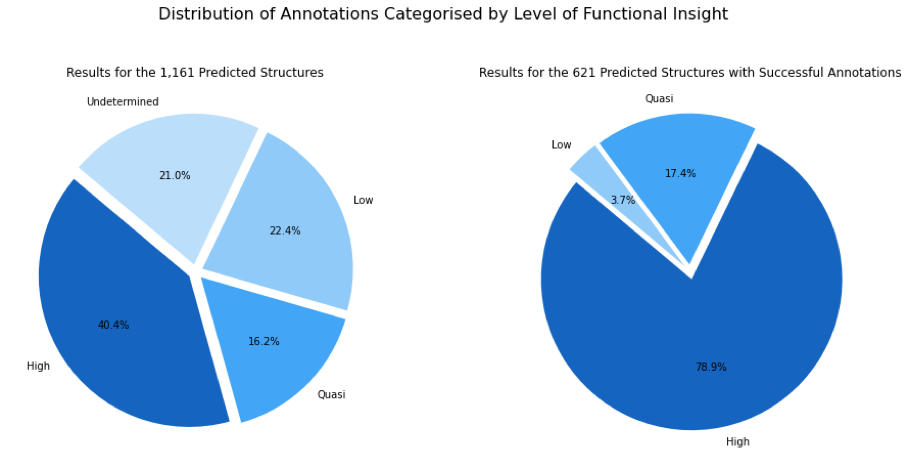

/tmp/ipykernel_374808/1145851251.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_high_annot_counts.values, y=top_high_annot_counts.index, palette='viridis')


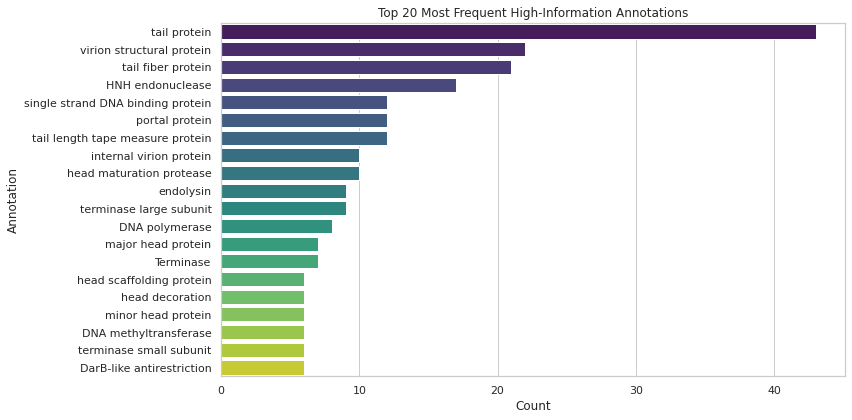

In [4]:
sns.set(style="whitegrid")
annotations_df = pd.read_csv('foldseek_annotations_with_information.csv')  
annotations_df['best_annotation'] = annotations_df['best_annotation'].replace({
    'Phage tail protein': 'tail protein',
    'Tail protein': 'tail protein'
})

if 'information' not in annotations_df.columns:
    def classify_information(annotation):
        return 'High' if 'protein' in annotation.lower() else 'Low'
    annotations_df['information'] = annotations_df['best_annotation'].apply(classify_information)

high_annotations = annotations_df[annotations_df['information'] == 'High']

top_high_annot_counts = high_annotations['best_annotation'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_high_annot_counts.values, y=top_high_annot_counts.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Annotation")
plt.title("Top 20 Most Frequent High-Information Annotations")
plt.tight_layout()
plt.show()

In [24]:
cluster_table = pd.read_csv('final_cluster_rep.tsv', sep='\t')
rep_annotations = pd.read_csv('best_per_protein_foldseek_annotations.csv')

rep_lookup = rep_annotations.set_index('protein')[['best_annotation', 'information']]

expanded_rows = []

for _, row in cluster_table.iterrows():
    rep = row['cluster_representative']
    
    if rep not in rep_lookup.index:
        continue  
    
    proteins = str(row['in_cluster']).split(',')
    proteins = [p.strip() for p in proteins] 
    
    # For each protein in the cluster
    for prot in proteins:
        expanded_rows.append({
            'Cluster_Representative': rep,
            'Protein': prot,
            'Cluster_Annotation': rep_lookup.loc[rep, 'best_annotation'],
            'Information_Level': rep_lookup.loc[rep, 'information']
        })

final_df = pd.DataFrame(expanded_rows)
final_df.to_csv('full_clusters_added_annotations.csv', index=False)

print("Final dataset saved as 'full_clusters_added_annotations.csv' with only annotated cluster representatives.")




 Final dataset saved as 'full_clusters_added_annotations.csv.csv' including all proteins and cluster reps.
